In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline  
sns.set(color_codes=True) # adds a nice background to the graphs

In [2]:
import math
from scipy import stats
from scipy.stats import   ttest_1samp, ttest_ind
import scipy.stats as stats
import statsmodels.stats.api as sm

In [4]:
Wsale= pd.read_csv('Wholesale+Customers+Data.csv')
Wsale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [8]:
Wsale.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [10]:
# 2 
Wsale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [23]:
#Create a column with sum of total sales across all the departments

Wsale['Total Sales']= Wsale['Fresh']+ Wsale['Milk']+Wsale['Grocery']+Wsale['Frozen'] + Wsale['Detergents_Paper'] +Wsale['Delicatessen']
Wsale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Sales
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


# 1.1

In [57]:
# Coding for Problem 1.1

#Create a column with sum of total sales across all the departments
Wsale['Total Sales']= Wsale['Fresh']+ Wsale['Milk']+Wsale['Grocery']+Wsale['Frozen'] + Wsale['Detergents_Paper'] +Wsale['Delicatessen']

#Groupby Region to figure out the summation of Total sales per Region
WsaleReg = Wsale[['Region','Total Sales']].groupby('Region').sum()
WsaleReg.reset_index(inplace=True)

#Arrange the table in Ascending order
WsaleReg.sort_values(by='Total Sales', ascending= True)

#Figure ourt the Region with Max and min sales
MaxReg = WsaleReg[WsaleReg['Total Sales']==WsaleReg['Total Sales'].max()][['Region','Total Sales']].set_index('Region')
MinReg = WsaleReg[WsaleReg['Total Sales']==WsaleReg['Total Sales'].min()][['Region','Total Sales']].set_index('Region')



In [74]:
#Doing the same as above line for Chanel

#Groupby Channel to figure out the summation of Total sales per Region
WsaleChan = Wsale[['Channel','Total Sales']].groupby('Channel').sum()
WsaleChan.reset_index(inplace= True)
WsaleChan.sort_values(by='Total Sales', ascending= True)

#Arrange the table in Ascending order
WsaleChan.sort_values(by='Total Sales', ascending= True)

#Figure out the Channel with Max and min sales
MaxChan = WsaleChan[WsaleChan['Total Sales']==WsaleChan['Total Sales'].max()][['Channel','Total Sales']].set_index('Channel')
MinChan = WsaleChan[WsaleChan['Total Sales']==WsaleChan['Total Sales'].min()][['Channel','Total Sales']].set_index('Channel')


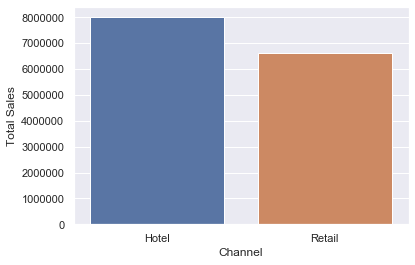

In [403]:
sns.barplot( WsaleChan['Channel'], WsaleChan['Total Sales'])

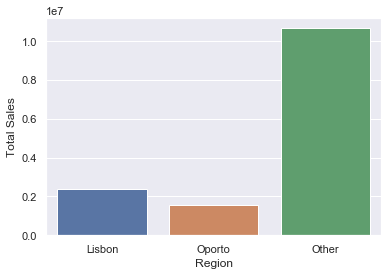

In [404]:

sns.barplot( WsaleReg['Region'], WsaleReg['Total Sales'])

In [73]:
#Answer to the Ques 1.1

print('The Region and Channel which seems to spend maximum are:','\n','\n', MaxReg , '\n','\n', MaxChan)

The Region and Channel which seems to spend maximum are: 
 
         Total Sales
Region             
Other      10677599 
 
          Total Sales
Channel             
Hotel        7999569


In [72]:

print('The Region and Channel which seems to spend minimum are:','\n','\n', MinReg , '\n','\n', MinChan)

The Region and Channel which seems to spend minimum are: 
 
         Total Sales
Region             
Oporto      1555088 
 
          Total Sales
Channel             
Retail       6619931


In [382]:
MaxReg.to_csv('Maximum Region.csv')
MinReg.to_csv('Minimum Region.csv')
MaxChan.to_csv('Max Channel.csv')
MinChan.to_csv('Min Channel.csv')

# 1.2

In [383]:
Wdescribe = Wsale.describe().T. round()


In [387]:
#Create a new Column to Measure the Coff of Variance for each food item
Wdescribe['Coff Variance']= Wdescribe['std']/Wdescribe['mean']

Wdescribe

,count,mean,std,min,25%,50%,75%,max,Coff Variance
Buyer/Spender,440.0,220.0,127.0,1.0,111.0,220.0,330.0,440.0,0.577273
Fresh,440.0,12000.0,12647.0,3.0,3128.0,8504.0,16934.0,112151.0,1.053917
Milk,440.0,5796.0,7380.0,55.0,1533.0,3627.0,7190.0,73498.0,1.273292
Grocery,440.0,7951.0,9503.0,3.0,2153.0,4756.0,10656.0,92780.0,1.195196
Frozen,440.0,3072.0,4855.0,25.0,742.0,1526.0,3554.0,60869.0,1.580404
Detergents_Paper,440.0,2881.0,4768.0,3.0,257.0,816.0,3922.0,40827.0,1.654981
Delicatessen,440.0,1525.0,2820.0,3.0,408.0,966.0,1820.0,47943.0,1.849180
Total Sales,440.0,33226.0,26356.0,904.0,17449.0,27492.0,41308.0,199891.0,0.793234




No! the 6 food categories do not show similar behaviour across Regions and Channels


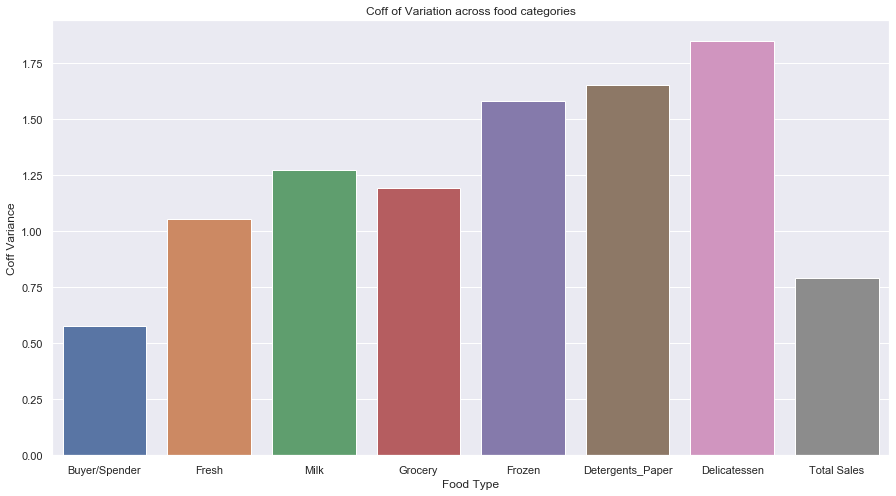

<Figure size 432x288 with 0 Axes>

In [394]:
#Reset Index to create Food categories as Columns

Wdescribe1 = Wdescribe.reset_index()
Wdescribe1['Food Type']= Wdescribe1['index']

#Plot a bar plot against the Coff of Variation to access the variability in different food categories
print('\n')
print('No! the 6 food categories do not show similar behaviour across Regions and Channels')

plt.figure(figsize=(15,8))
plt.title('Coff of Variation across food categories')
sns.barplot( Wdescribe1['Food Type'] ,Wdescribe1['Coff Variance'])
plt.show()
plt.savefig('Similarityin food type.jpg', dpi=300)

# 1.3

In [396]:
# 1.3- On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
#Which items shows the least inconsistent behaviour?


#Remove unnecessary rows from Wdescribe

Wdescribe.drop(index = 'Buyer/Spender', inplace= True)
Wdescribe.drop(index = 'Total Sales', inplace= True)

Wdescribe

,count,mean,std,min,25%,50%,75%,max,Coff Variance
Fresh,440.0,12000.0,12647.0,3.0,3128.0,8504.0,16934.0,112151.0,1.053917
Milk,440.0,5796.0,7380.0,55.0,1533.0,3627.0,7190.0,73498.0,1.273292
Grocery,440.0,7951.0,9503.0,3.0,2153.0,4756.0,10656.0,92780.0,1.195196
Frozen,440.0,3072.0,4855.0,25.0,742.0,1526.0,3554.0,60869.0,1.580404
Detergents_Paper,440.0,2881.0,4768.0,3.0,257.0,816.0,3922.0,40827.0,1.654981
Delicatessen,440.0,1525.0,2820.0,3.0,408.0,966.0,1820.0,47943.0,1.849180


In [152]:

#Create variables for Maximum and minimum Coff of Variance
Minconsistent = Wdescribe[Wdescribe['Coff Variance']==Wdescribe['Coff Variance'].max()]['Coff Variance']
Linconsistent = Wdescribe[Wdescribe['Coff Variance']==Wdescribe['Coff Variance'].min()]['Coff Variance']

In [153]:
print('The Food category with most inconsistent behaviour:', '\n ', Minconsistent )
print('\n', '\n')
print('The Food category with least inconsistent behaviour:','\n',  Linconsistent) 

The Food category with most inconsistent behaviour: 
  Delicatessen    1.84918
Name: Coff Variance, dtype: float64

 

The Food category with least inconsistent behaviour: 
 Fresh    1.053917
Name: Coff Variance, dtype: float64


In [395]:
Minconsistent.to_csv('Inconsistent.csv')
Linconsistent.to_csv('Consistent.csv')

# 1.4


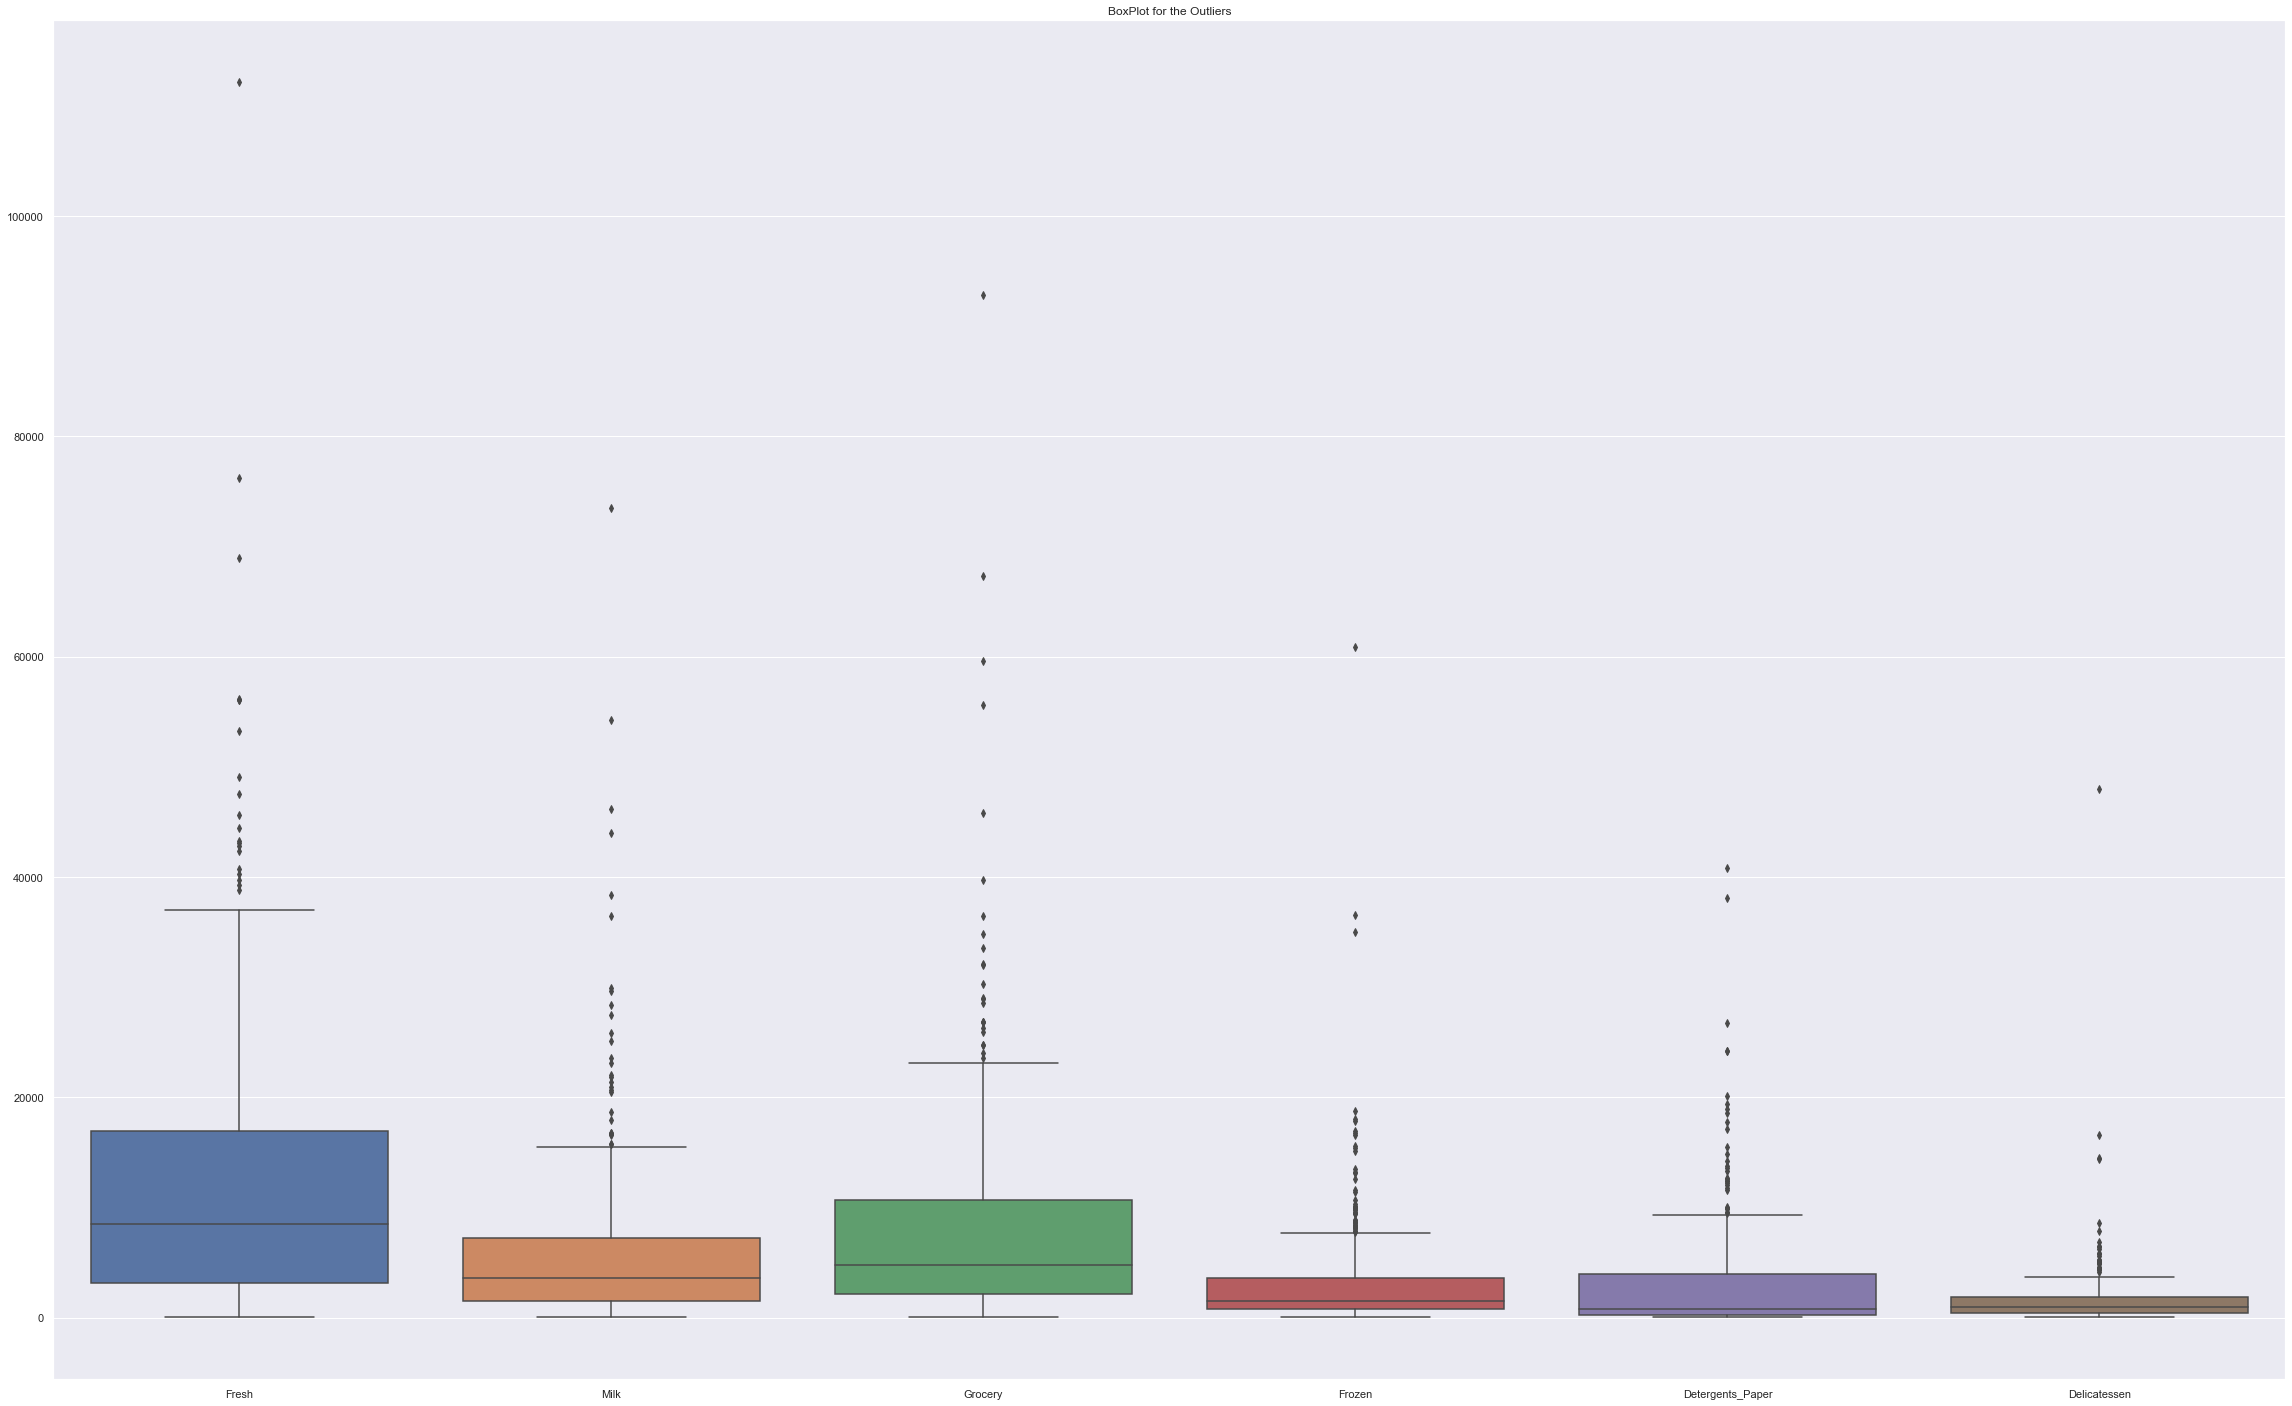

<Figure size 432x288 with 0 Axes>

In [408]:
Wboxplot = Wsale.drop(['Buyer/Spender','Total Sales'], axis =1)

Wboxplot

#Boxplot for the whole table of the food items :  Wboxplot
plt.figure(figsize=(40,25))
plt.title('BoxPlot for the Outliers')
sns.boxplot( data = Wboxplot )
plt.show()
plt.savefig('Boxplot.pdf')

In [142]:
print('YES! There are outliers in the data')

YES! There are outliers in the data


# 1.5

In [417]:
Wsale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Sales
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [421]:
WGroup = Wsale.groupby(['Region','Channel']).mean().round(2)
WGroup

Buyer/Spender     Fresh      Milk   Grocery   Frozen  \
Region Channel                                                         
Lisbon Hotel           237.73  12902.25   3870.20   4026.14  3127.32   
       Retail          226.06   5200.00  10784.00  18471.94  2584.11   
Oporto Hotel           321.00  11650.54   2304.25   4395.50  5745.04   
       Retail          311.11   7289.79   9190.79  16326.32  1540.58   
Other  Hotel           227.58  13878.05   3486.98   3886.73  3656.90   
       Retail          152.44   9831.50  10981.01  15953.81  1513.20   

                Detergents_Paper  Delicatessen  Total Sales  
Region Channel                                               
Lisbon Hotel              950.53       1197.15     26073.59  
       Retail            8225.28       1871.94     47137.28  
Oporto Hotel              482.71       1105.89     25683.93  
       Retail            8410.26       1239.00     43996.74  
Other  Hotel              786.68       1518.28     27213.64  
       Retail            6899.24       1826.21     47004.97

In [424]:
WGroup.to_csv('Recom1.5.csv')

In [143]:
print(' For Recommendations, please refer to the Report submitted.')

 For Recommendations, please refer to the Report submitted.


# Question no 2

In [3]:
Survey = pd.read_csv('Survey.csv')

In [4]:
Survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


# 2.1

In [5]:
# 2.1.1- CrossTab of Gender and Major 
majors = pd.crosstab(Survey['Gender'], Survey['Major'], margins= 'All')
majors


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [6]:
#2.1.2 - Crosstab of Gender and Graduation Intention

grad_intention = pd.crosstab(Survey['Gender'], Survey['Grad Intention'],margins= 'All')
grad_intention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [7]:
#2.1.3 - Crosstab of Gender and Employement Status

employment = pd.crosstab(Survey['Gender'], Survey['Employment'],margins= 'All')
employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [8]:
#2.1.4 - Crosstab of Gender and Laptop Preference

laptop = pd.crosstab(Survey['Gender'], Survey['Computer'],margins= 'All')
laptop

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2.1

In [9]:
#2.2.1

# Get seperate Value counts gender wise
a= Survey['Gender'].value_counts()

#Calculate the number of Males and Females
total_males = a['Male']
total_females = a['Female']

#Calculate the total no of the students
b =Survey['Gender'].count()

#Calculate the required probability
p_male =round(a['Male']/b,2)

print('The probability that a randomly selected student is a MALE is:', p_male)
print('\n')
print('The probability that a randomly selected student is a FEMALE is:',(1- p_male))


The probability that a randomly selected student is a MALE is: 0.47


The probability that a randomly selected student is a FEMALE is: 0.53


In [10]:
a

Female    33
Male      29
Name: Gender, dtype: int64

In [12]:
b

62

# 2.2.2

In [270]:
majors

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [281]:
#Conditional Probability of different Majors for Male students
male_major_cp = majors.iloc[1]/total_males

print('The CONDITIONAL PROBABILITY of different Majors for MALE students is as follows:','\n','\n',male_major_cp.round(2))

The CONDITIONAL PROBABILITY of different Majors for MALE students is as follows: 
 
 Major
Accounting                0.14
CIS                       0.03
Economics/Finance         0.14
International Business    0.07
Management                0.21
Other                     0.14
Retailing/Marketing       0.17
Undecided                 0.10
All                       1.00
Name: Male, dtype: float64


In [241]:
#Conditional Probability of different Majors for Female students\
female_major_cp = majors.iloc[0]/total_females
print('The CONDITIONAL PROBABILITY of different Majors for FEMALE students is as follows:','\n','\n',female_major_cp.round(2))

The CONDITIONAL PROBABILITY of different Majors for FEMALE students is as follows: 
 
 Major
Accounting                0.09
CIS                       0.09
Economics/Finance         0.21
International Business    0.12
Management                0.12
Other                     0.09
Retailing/Marketing       0.27
Undecided                 0.00
Name: Female, dtype: float64


In [410]:
male_major_cp.to_csv('2.2.2Male.csv')
female_major_cp.to_csv('2.2.2Female.csv')

# 2.2.3

In [412]:
# prob_grad_male = prob(Male and Graduate)/ prob(Male)
prob_grad_male = (grad_intention['Yes'][1]/b) / p_male
print('The conditional probability of intent to graduate, given that the student is a male is: ',prob_grad_male.round(2))

The conditional probability of intent to graduate, given that the student is a male is:  0.58


In [413]:
# prob_grad_female = prob(Female and Graduate)/ prob(Female)
prob_grad_female = (grad_intention['Yes'][0]/b) / (1-p_male)
print('The conditional probability of intent to graduate, given that the student is a male is:',prob_grad_female.round(2))

The conditional probability of intent to graduate, given that the student is a male is: 0.33


# 2.2.4 : The Conditional Probability for Males and Females on the basis of Employement status

In [286]:
#Conditional Probability of different Majors for Male students
male_emp_cp = employment.iloc[1]/employment['All'][1]

print('The CONDITIONAL PROBABILITY of different EmploymentStatus for MALE students is as follows:','\n','\n',male_emp_cp.round(2))

The CONDITIONAL PROBABILITY of different EmploymentStatus for MALE students is as follows: 
 
 Employment
Full-Time     0.24
Part-Time     0.66
Unemployed    0.10
All           1.00
Name: Male, dtype: float64


In [288]:
#Conditional Probability of different Majors for Male students
female_emp_cp = employment.iloc[0]/employment['All'][0]

print('The CONDITIONAL PROBABILITY of different EmploymentStatus for FEMALE students is as follows:','\n','\n',female_emp_cp.round(2))

The CONDITIONAL PROBABILITY of different EmploymentStatus for FEMALE students is as follows: 
 
 Employment
Full-Time     0.09
Part-Time     0.73
Unemployed    0.18
All           1.00
Name: Female, dtype: float64


In [416]:
male_emp_cp.to_csv('Male2.2.4.csv')
female_emp_cp.to_csv('Female2.2.4.csv')

# 2.2.5 
## Conditional probability of laptop preference among the male students as well as among the female students.

In [414]:
#Conditional Probability of Laptop for Male students
male_comp_cp = laptop['Laptop'][1]/laptop['All'][1]

print('The CONDITIONAL PROBABILITY of Laptop Preference for MALE students is:',male_comp_cp.round(2))

The CONDITIONAL PROBABILITY of Laptop Preference for MALE students is: 0.9


In [415]:
#Conditional Probability of different Laptop for FeMale students
female_comp_cp = laptop['Laptop'][0]/laptop['All'][0]

print('The CONDITIONAL PROBABILITY of different Laptop Status for FEMALE students is:',female_comp_cp.round(2))

The CONDITIONAL PROBABILITY of different Laptop Status for FEMALE students is: 0.88


# 2.3- In the Report

# 2.4

### Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [318]:
norm_dist = Survey[['Salary','Spending','Text Messages']]
norm_dist

,Salary,Spending,Text Messages
0,50.0,350,200
1,25.0,360,50
2,45.0,600,200
3,40.0,600,250
4,40.0,500,100
...,...,...,...
57,40.0,1000,10
58,40.0,350,250
59,55.0,500,500
60,30.0,490,50


In [367]:
# Testing for Shapiro Test
W, p = stats.shapiro(norm_dist['Salary'])
p

0.028000956401228905

In [363]:
W, p = stats.shapiro(norm_dist['Spending'])
p

1.6854661225806922e-05

In [364]:
W, p = stats.shapiro(norm_dist['Text Messages'])
p

4.324040673964191e-06

In [349]:
# Testing the Normality via comparing Mean and Median

summary = norm_dist.describe().T
print(summary)
print('\n')
print('The conclusions from Summarizing the data are as follows:','\n')
print('1. Salary and 2. Spending display more characteristics of normal distribution because their Median is very close to the Mean')

               count        mean         std    min    25%    50%    75%  \
Salary          62.0   48.548387   12.080912   25.0   40.0   50.0   55.0   
Spending        62.0  482.016129  221.953805  100.0  312.5  500.0  600.0   
Text Messages   62.0  246.209677  214.465950    0.0  100.0  200.0  300.0   

                  max  
Salary           80.0  
Spending       1400.0  
Text Messages   900.0  


The conclusions from Summarizing the data are as follows: 

1. Salary and 2. Spending display more characteristics of normal distribution because their Median is very close to the Mean


In [338]:
print('The conclusions are as follows:')
print('1. Salary and 2. Spending display more characteristics of normal distribution because their Median is very close to the Mean.')

The conclusions are as follows:
1. Salary and 2. Spending display more characteristics of normal distribution because their Median is very close to the Mean.


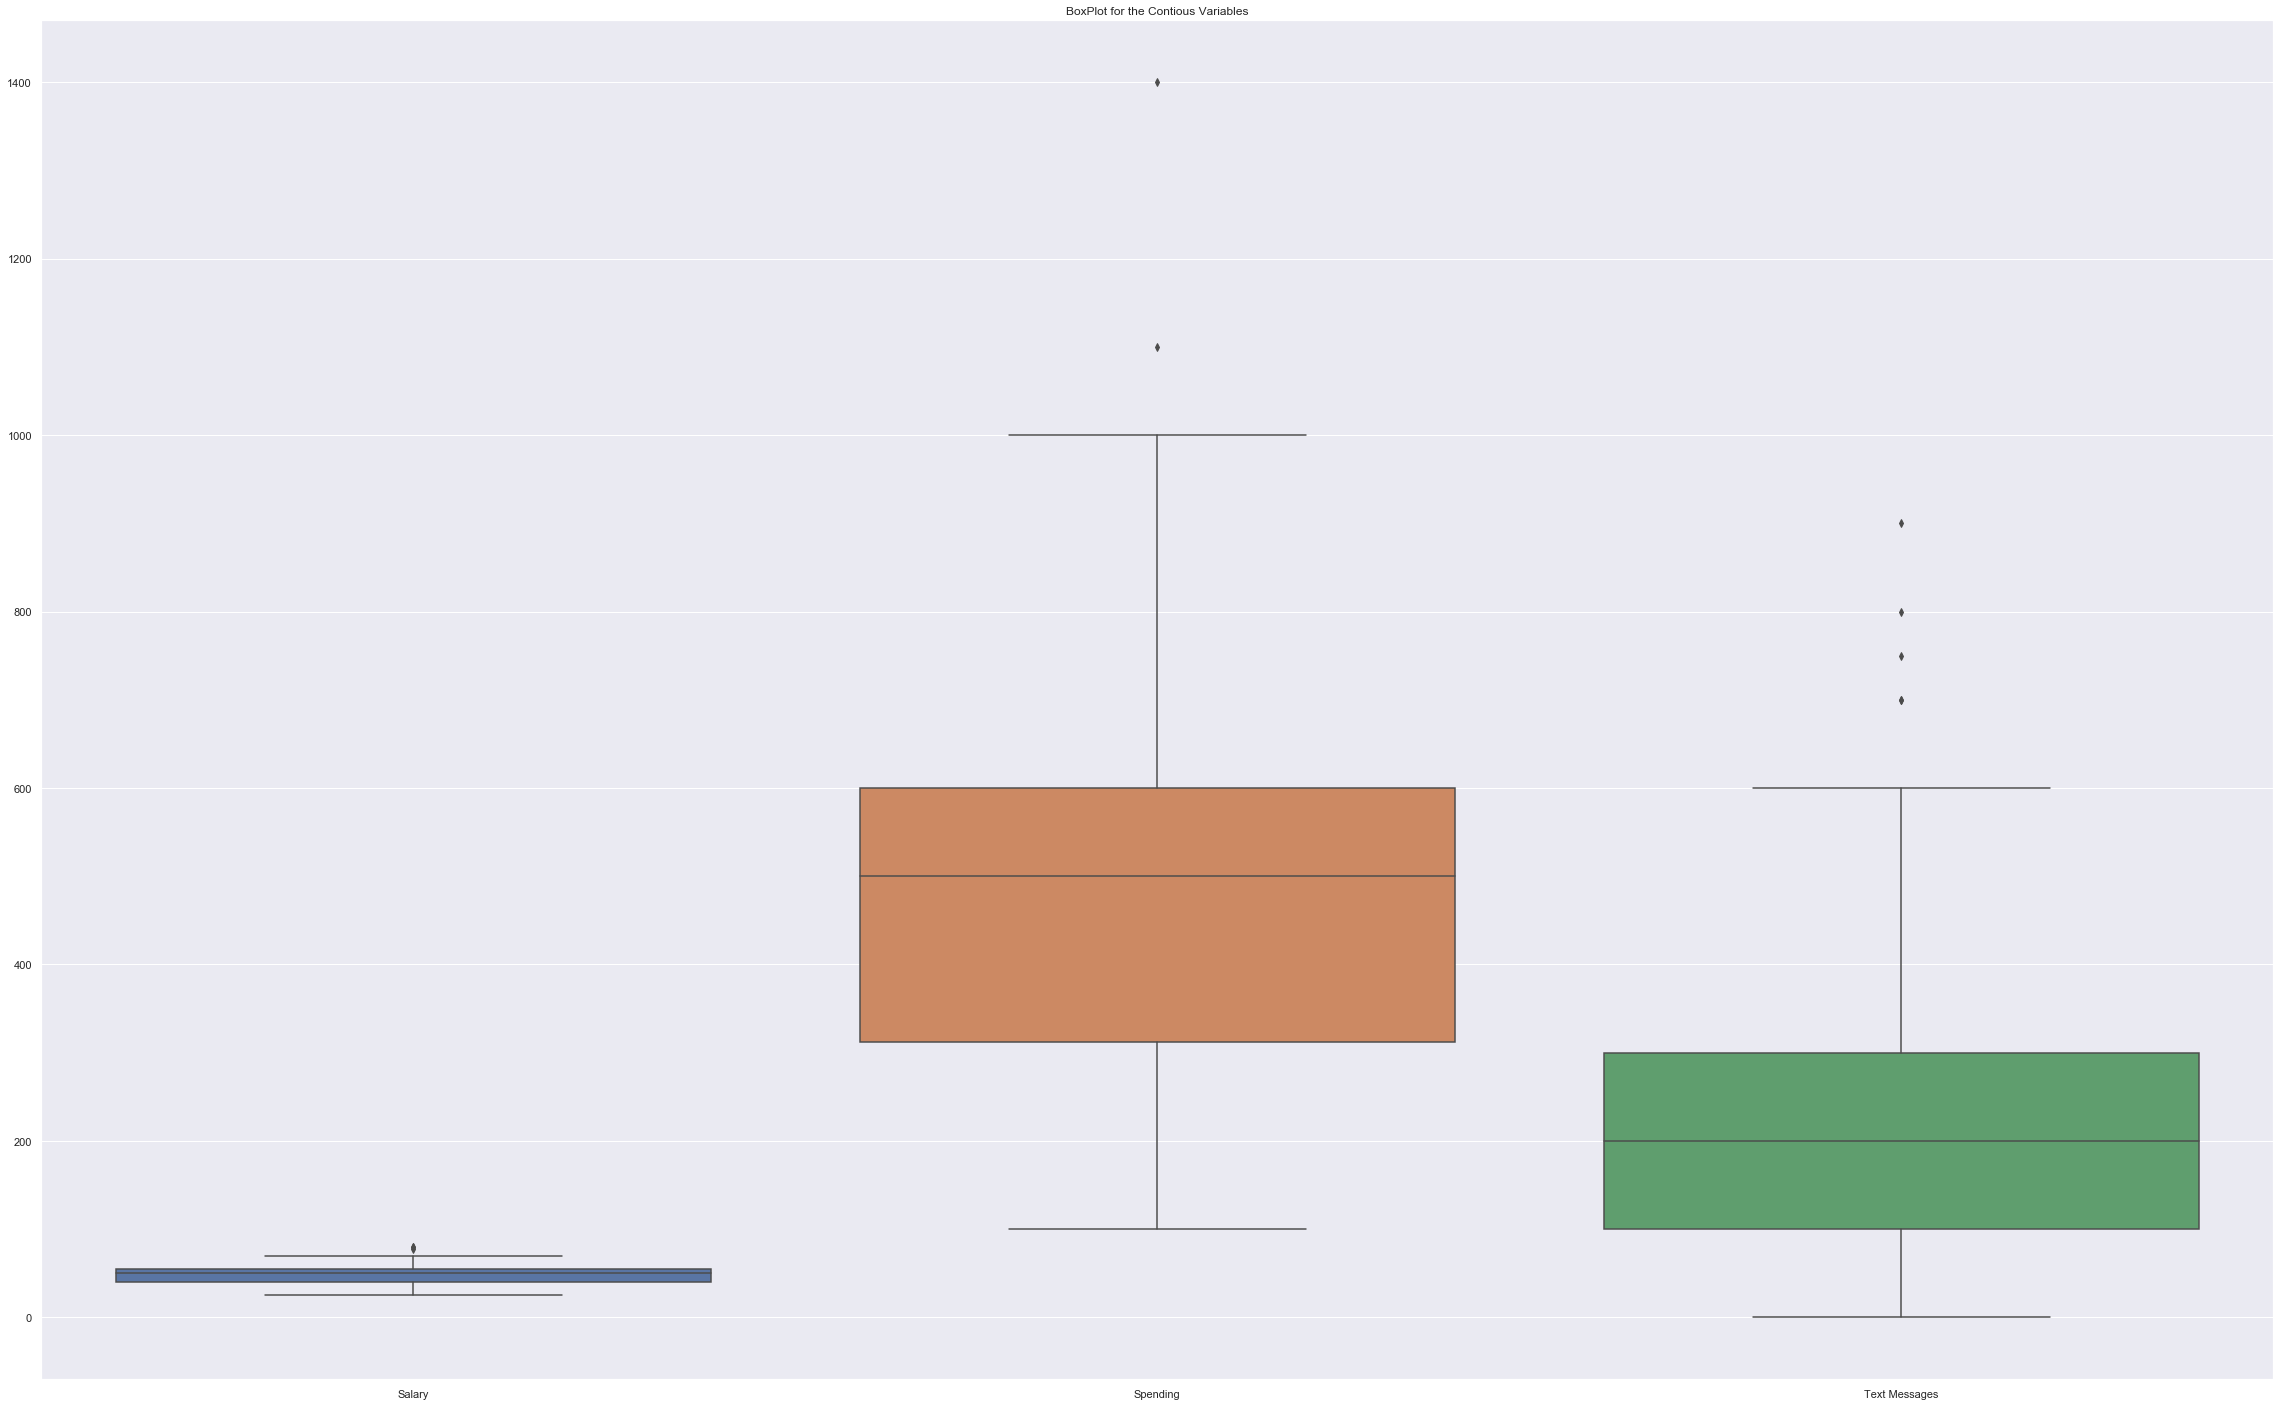

The conclusions from BOXPLOT are as follows:
1. Salary and 2. Spending display more characteristics of normal distribution because of the BOXPLOT being more uniform.


In [350]:
# Testing the normality by plotting a Box pLot

plt.figure(figsize=(40,25))
plt.title('BoxPlot for the Contious Variables')
sns.boxplot( data = norm_dist )
plt.show()

print('The conclusions from BOXPLOT are as follows:')
print('1. Salary and 2. Spending display more characteristics of normal distribution because of the BOXPLOT being more uniform.')

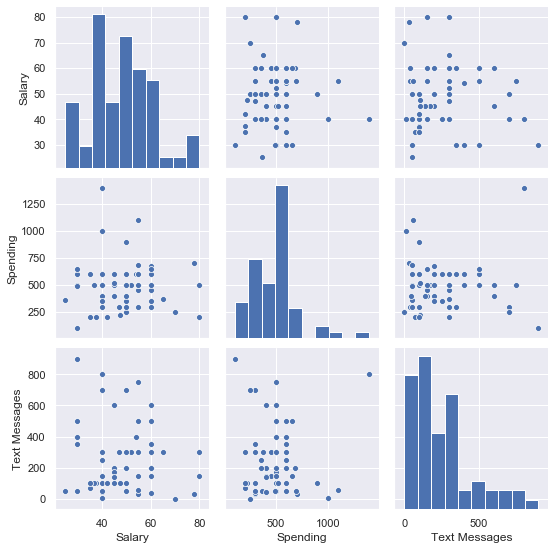

In [346]:
sns.pairplot(norm_dist[['Salary', 'Spending', 'Text Messages']]);

In [366]:
# Testing SKEWNESS
Skew_Sal = stats.skew(norm_dist['Salary'])
Skew_Sal

0.5216766008645851

In [357]:
stats.skew(norm_dist['Spending'])

1.5472850312929523

In [358]:
stats.skew(norm_dist['Text Messages'])

1.2642446834439687

# 3.1 : ABC Asphalt Shingles

In [368]:
shingles = pd.read_csv('A+&+B+shingles.csv')

In [370]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


## Hypothesis Formation
## H0 => (Mean_A - Mean_B) = 0
## Ha => (Mean_A - Mean_B) != 0

# 2 Sample test for A

In [434]:
t_statistic, p_value = ttest_ind(shingles['A'], shingles['B'], nan_policy = 'omit')

In [435]:
t_statistic, p_value

(1.2896282719661123, 0.2017496571835306)

In [437]:
if p_value <0.05: #Assuming alpha = 0.05
    print('We reject the null hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

We fail to reject the Null Hypothesis
